<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-lorgid1/blob/master/Examen_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Distribuidos
## Primera evaluacion

Se evaluaran los siguientes puntos:

### Importar datos

1. Adquirir los datos.
> * El conjunto de datos con el que van a trabajar esta disponibles en [este enlace](https://archive.org/download/nycTaxiTripData2013/trip_data.7z) y consiste en 12 archivos de texto que tiene informacion del viajes de taxis en la ciudad de NY durante el 2013.
> * En la red interna de LANIA usando cable la descarga del archivo comprimido desde el enlace tomó entre 5 y 10 minutos. Tomen sus provisiones
> * El archivo comprimido tiene un tamaño de aproximadamente 4G, el tamaño de archivo mensual oscila entre 2.0 y 2.5G. La base de datos completa es de aproximadamente 30G.
2. Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion
>` !7z x trip_data.7z -o/content/`
sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses. 
3. Responder las siguientes preguntas:
   1. Cuantas columnas contiene cada archivo de datos descomprimido
   2. Cuantos renglones tiene cada archivo
4. Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:
    1. indicar claramente cuantos son los renglones con errores y a que archivos corresponden
    2. crear un nuevo conjunto de datos con los errores eliminados
5. Crear un `DataFrame` usando la libreria `pandas` y responder lo siguiente:
   1. Indicar el tiempo en segundos, que  tarda la libreria `pandas` en leer un archivo a un  `DataFrame`
   2. Cual es la huella de memoria del proceso usado para generar el objeto `DataFrame`
   2. Cuanta memoria del sistema se usa para crear el objeto anterior
   3. Indicar el tiempo que tarda `pandas` en obtener el promedio de la distancia de viaje (`trip_distance`)
6. Todos los pasos siguientes deben **realizarse** usando la libreria `dask`
   3. Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (`trip_distance`)
   3. Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (`trip_time_in_secs`)
   4. Con las columnas `pickup_datetime` y `dropoff_datetime` como objetos temporales, crear una nueva columna en los dataframes que se llame `duracion` y compararla renglon a renglon con la columna `trip_time_in_secs`
   5. Definir un `viaje_largo` como aquellos en los que la duracion del viaje (`trip_time_in_secs`) sea mayor a 20 minutos.
7. Contar el numero de viajes largos en cada archivo
8. De los viajes largos, identificar el numero de taxis diferentes (la columna `medallion` contiene un numeroque identificada a cada uno de los vehiculos). Que vehiculos son los que mas viajes realizan en cada mes? Son el mismo vehiculo?
9. Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?
10. Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por
   * dia de la semana (un color distinto para cada dia)
   * hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)
11. Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.


## Se realizo en conjunto con:
####Jose David Cobos Trujillo
####Luis Daniel Hernandez Jimenez
####Samuel Baez Herrera
####Lorrain Eugenio Giddings Soto
####Yoselin Araceli Campos Sacramento
####Ana Margarita Reyes Hernandez
####Alexis Martinez Arteaga
####Aguilar Hernandez Joaquin
####Georgina Valenzuela Carrasco
#### Horacio Tapia McClung

## Importar datos

In [2]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z

--2019-06-18 21:46:41--  https://archive.org/download/nycTaxiTripData2013/trip_data.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z [following]
--2019-06-18 21:46:41--  https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z
Resolving ia802501.us.archive.org (ia802501.us.archive.org)... 207.241.228.191
Connecting to ia802501.us.archive.org (ia802501.us.archive.org)|207.241.228.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4102781969 (3.8G) [application/x-7z-compressed]
Saving to: ‘trip_data.7z.1’

trip_data.7z.1      100%[===================>]   3.82G  12.7MB/s    in 5m 46s  

2019-06-18 21:52:27 (11.3 MB/s) - ‘trip_data.7z.1’ saved [4102781969/4102781969]



In [0]:
import pandas as pd
import time
import os
import psutil
import gdal

In [0]:
def huella_de_memoria():
  ''' Regresa la memoria usada por un proceso en Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [5]:
!7z e trip_data.7z -o/content trip_data_1.csv


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4102781969 bytes (3913 MiB)

Extracting archive: trip_data.7z
--
Path = trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

  0%      0% - trip_data_1.csv                        1% - trip_data_1.csv                        2% - trip_data_1.csv                        3% - trip_data_1.csv                        4% - trip_data_1.csv                        5% - trip_data_1.csv                      

In [8]:

memoriaAntes = huella_de_memoria()
t_start = time.time()
df = pd.read_csv('trip_data_1.csv')
t_end = time.time()
memoriaDespues = huella_de_memoria()
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]

print('pd.read_csv(): {} m'.format(memoriaDespues-memoriaAntes)) # time [m]

pd.read_csv(): 58.838810443878174 s
pd.read_csv(): -4964.0 m


In [9]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [10]:
df.shape

(14776615, 14)

In [11]:
df.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

In [13]:
df.head()

medallion  ... dropoff_latitude
0  89D227B655E5C82AECF13C3F540D4CF4  ...        40.751171
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  ...        40.750660
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  ...        40.726002
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  ...        40.759388
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  ...        40.747868

[5 rows x 14 columns]

In [0]:
cuantosTaxis=df['medallion'].value_counts()
cuantosTaxis[0]

2137

In [0]:
# selecciona
este="7E1346F23960CC18D7D129FA28B63A75"
# taxi

In [0]:
estos=df[df.medallion==este]

In [0]:
estos.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'hour', 'weekday'],
      dtype='object')

In [14]:
df.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [15]:
df.isna().sum() # Samuel

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [0]:
df = df.dropna(subset= ['dropoff_latitude','dropoff_longitude'], how = 'all') #Samuel

In [20]:
df.isnull().sum() #Samuel

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326121
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
dtype: int64

In [21]:
df.shape

(14776529, 14)

In [29]:
df['passenger_count'].value_counts() # Luis Daniel

1      10471701
2       1986196
5        920006
3        597485
6        520066
4        280992
0            80
255           1
208           1
9             1
Name: passenger_count, dtype: int64

In [0]:
del df['store_and_fwd_flag'] #Lorrain

In [23]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [31]:
%%time
#inicio = time.time()
es_Cero = (df['trip_distance'] != 0)
#fin = time.time()
#print(es_Cero.mean(), " ", fin-inicio)

#Alexis y Samuel

#Obener el tiempo que tarda panda en obtener el promedio de trip_distance

CPU times: user 29 ms, sys: 986 µs, total: 30 ms
Wall time: 31.2 ms


In [0]:
# convert dropoff times to datetimes
# estos['dropoff_datetime'] = pd.to_datetime(estos['dropoff_datetime'])
estos['hour'] = estos['dropoff_datetime'].dt.hour
estos['weekday'] = estos['dropoff_datetime'].dt.weekday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
estePorHora = estos.groupby('hour')

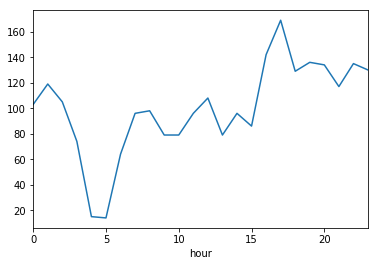

In [0]:

estePorHora['passenger_count'].sum().plot.line()

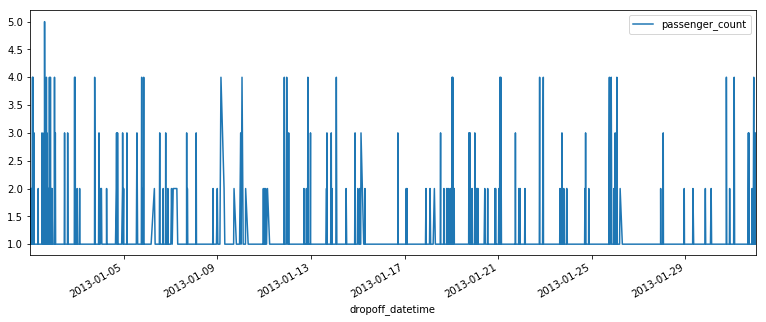

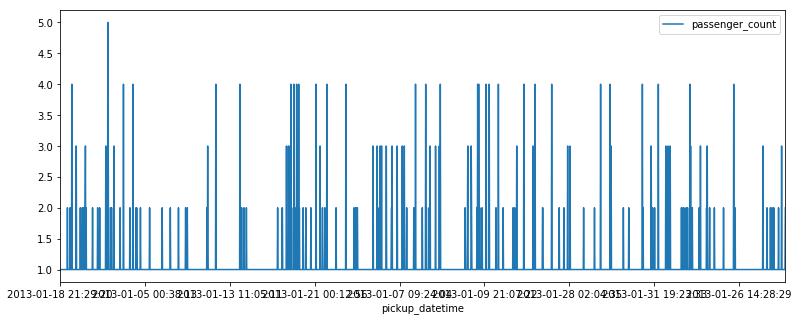

In [0]:
estos.plot.line(x='dropoff_datetime', y='passenger_count', figsize=(13,5))
estos.plot.line(x='pickup_datetime', y='passenger_count', figsize=(13,5))